In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
flights = sns.load_dataset('flights')
print(flights.isna())

      year  month  passengers
0    False  False       False
1    False  False       False
2    False  False       False
3    False  False       False
4    False  False       False
..     ...    ...         ...
139  False  False       False
140  False  False       False
141  False  False       False
142  False  False       False
143  False  False       False

[144 rows x 3 columns]


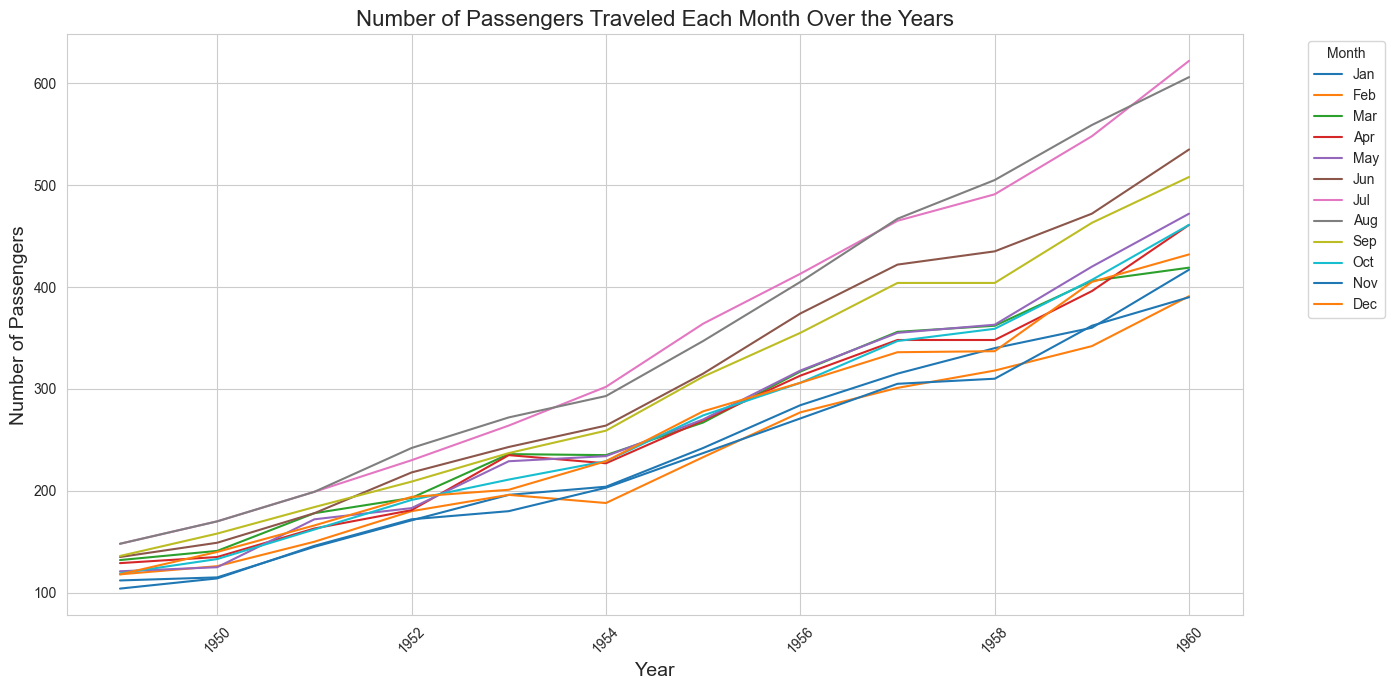

In [4]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a line plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=flights, x='year', y='passengers', hue='month', palette='tab10')

# Add titles and labels
plt.title('Number of Passengers Traveled Each Month Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Passengers', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\mjaff\AppData\Local\Temp\ipykernel_3380\266552192.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=flights, x='year', y='passengers', ci=None, hue="month", palette='viridis')


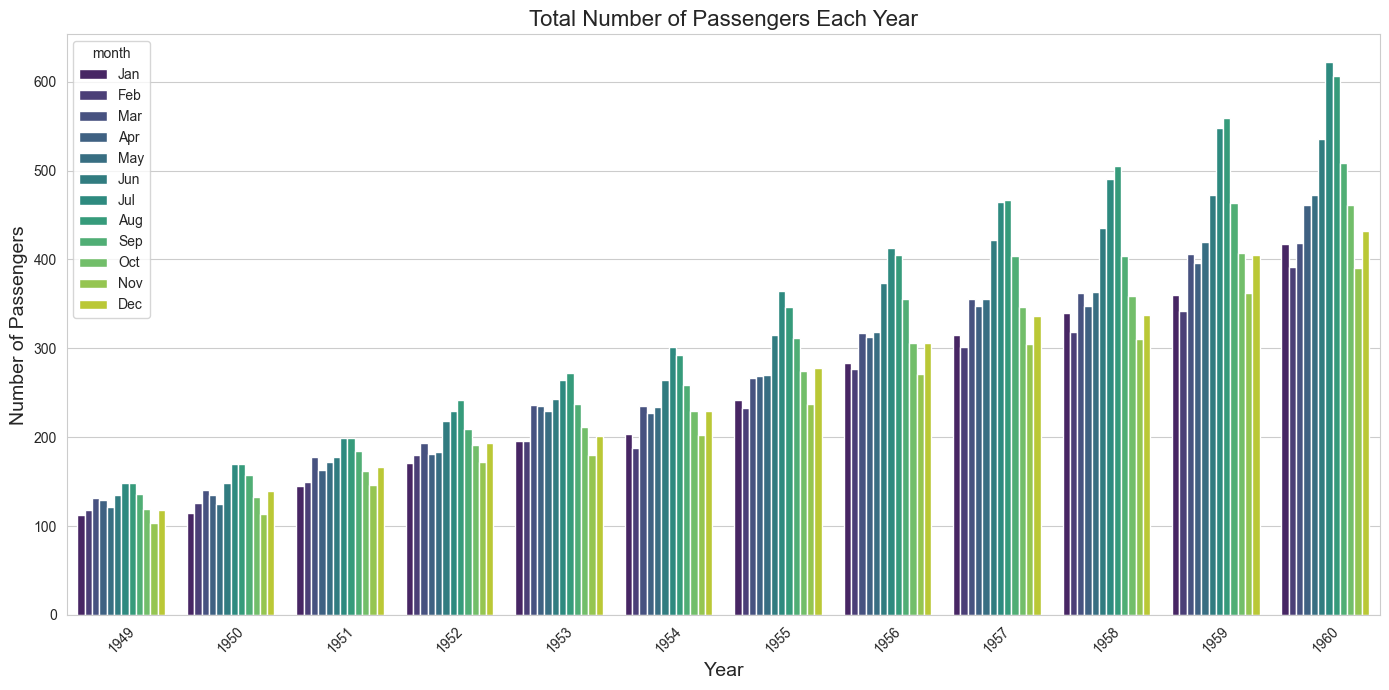

In [5]:
# Create a bar plot
plt.figure(figsize=(14, 7))
sns.barplot(data=flights, x='year', y='passengers', ci=None, hue="month", palette='viridis')

# Add titles and labels
plt.title('Total Number of Passengers Each Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Passengers', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [6]:
titanic = sns.load_dataset('titanic')
print(titanic.isna().sum())
titanic.head()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
# Cleaning the titanic dataset
# Check for missing values
# print(titanic.isna().sum())

# Fill missing values in 'age' with the median age
titanic['age'].fillna(titanic['age'].median(), inplace=True)

# Fill missing values in 'embarked' with the most frequent value
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)
titanic["embark_town"].fillna(titanic["embark_town"].mode()[0], inplace=True)

# Drop the 'deck' column as it has too many missing values
titanic.drop(columns=['deck'], inplace=True)

# Verify that there are no more missing values
print(titanic.isna().sum())

# Remove duplicates if any
titanic.drop_duplicates(inplace=True)

# Verify the cleaning process
print(titanic.info())
# print(flights.info())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     775 non-null    int64   
 1   pclass       775 non-null    int64   
 2   sex          775 non-null    object  
 3   age          775 non-null    float64 
 4   sibsp        775 non-null    int64   
 5   parch        775 non-null    int64   
 6   fare         775 non-null    float64 
 7   embarked     775 non-null    object  
 8   class        775 non-null    category
 9   who          775 non-null    object  
 10  adult_male   775 non-null    bool    
 11  embark_town  775 non-null    object  
 12  alive        775 non-null    object  
 13 

C:\Users\mjaff\AppData\Local\Temp\ipykernel_3380\1205069361.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)
C:\Users\mjaff\AppData\Local\Temp\ipykernel_3380\1205069361.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

C:\Users\mjaff\AppData\Local\Temp\ipykernel_3380\1378804058.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  survival_ratio = titanic.pivot_table('survived', index='class', columns='sex', aggfunc='mean')


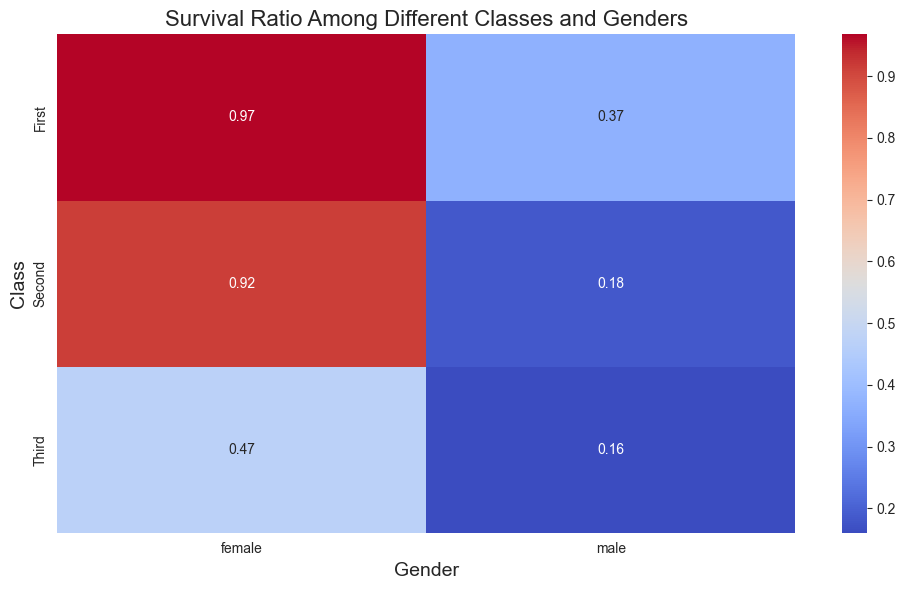

In [8]:
# Calculate the survival ratio among different classes
survival_ratio = titanic.pivot_table('survived', index='class', columns='sex', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(survival_ratio, annot=True, cmap='coolwarm', fmt='.2f')

# Add titles and labels
plt.title('Survival Ratio Among Different Classes and Genders', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Class', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

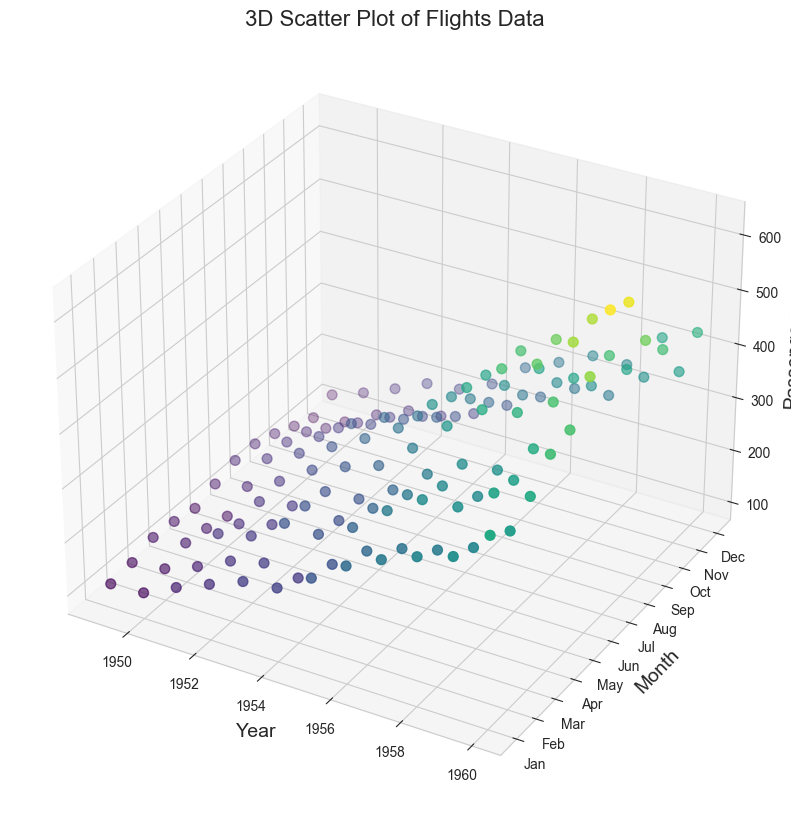

In [10]:
from mpl_toolkits.mplot3d import Axes3D

# Convert month to numerical values for plotting
flights['month_num'] = flights['month'].cat.codes + 1

# Create a 3D scatter plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the data
ax.scatter(flights['year'], flights['month_num'], flights['passengers'], c=flights['passengers'], cmap='viridis', s=50)

# Set labels
ax.set_title('3D Scatter Plot of Flights Data', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Month', fontsize=14)
ax.set_zlabel('Passengers', fontsize=14)

# Set month ticks
ax.set_yticks(range(1, 13))
ax.set_yticklabels(flights['month'].cat.categories)

plt.show()

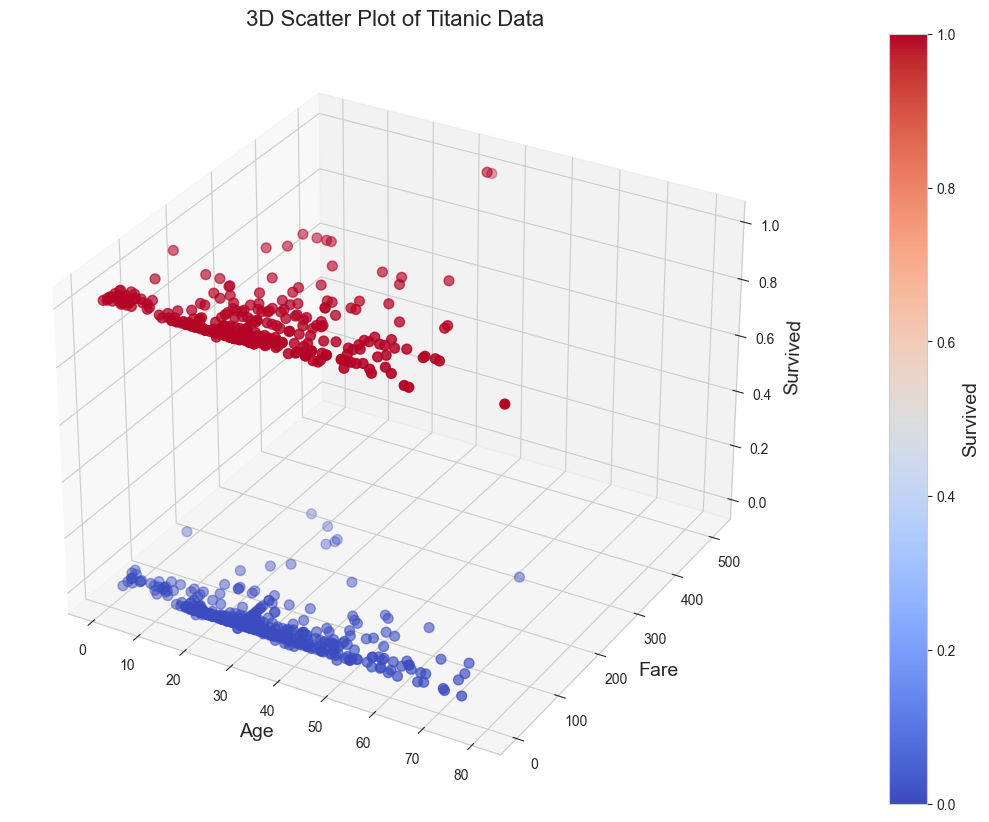

In [11]:
# Create a 3D scatter plot for Titanic data
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the data
sc = ax.scatter(titanic['age'], titanic['fare'], titanic['survived'], c=titanic['survived'], cmap='coolwarm', s=50)

# Set labels
ax.set_title('3D Scatter Plot of Titanic Data', fontsize=16)
ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('Fare', fontsize=14)
ax.set_zlabel('Survived', fontsize=14)

# Add color bar
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Survived', fontsize=14)

plt.show()

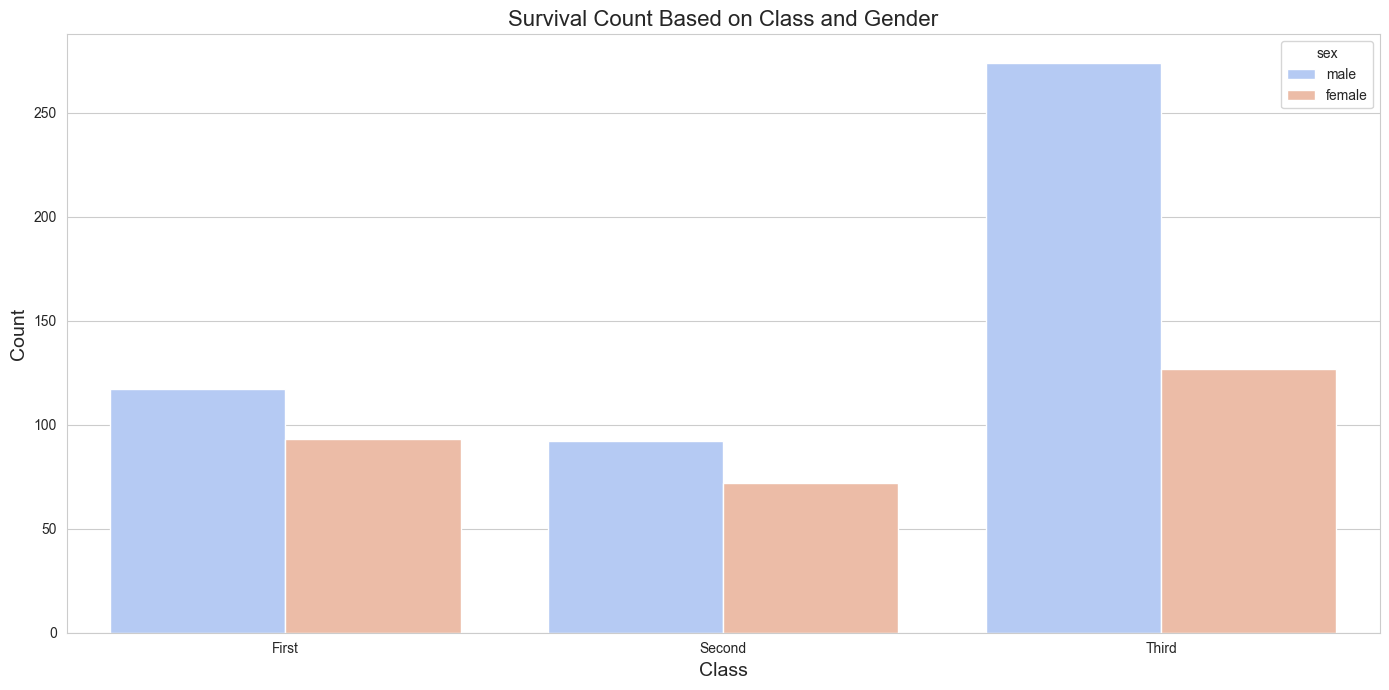

In [12]:
# Create a bar plot for survival count based on class and gender
plt.figure(figsize=(14, 7))
sns.countplot(data=titanic, x='class', hue='sex', palette='coolwarm')

# Add titles and labels
plt.title('Survival Count Based on Class and Gender', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

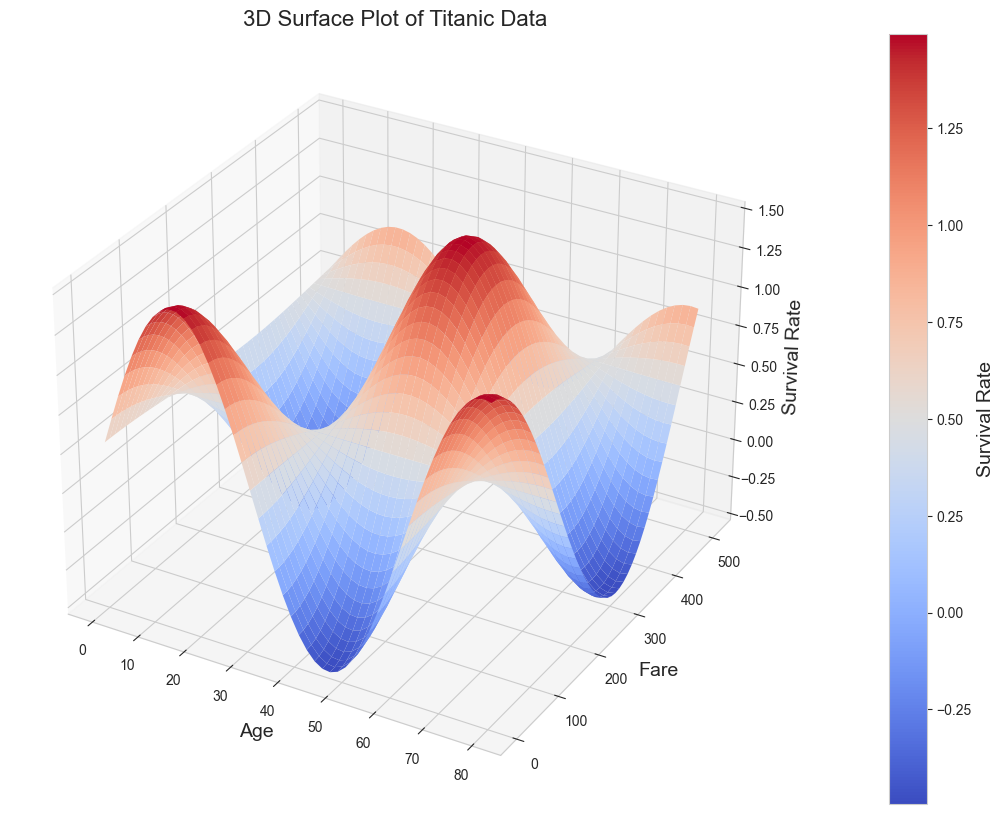

In [13]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

# Prepare data for 3D surface plot
age = titanic['age']
fare = titanic['fare']
survived = titanic['survived']

# Create a grid for age and fare
age_grid, fare_grid = np.meshgrid(np.linspace(age.min(), age.max(), 50), np.linspace(fare.min(), fare.max(), 50))

# Create a dummy function for survival rate based on age and fare
# This is just for demonstration purposes
survival_rate = np.sin(age_grid / 10) * np.cos(fare_grid / 100) + 0.5

# Create a 3D surface plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(age_grid, fare_grid, survival_rate, cmap=cm.coolwarm, edgecolor='none')

# Set labels
ax.set_title('3D Surface Plot of Titanic Data', fontsize=16)
ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('Fare', fontsize=14)
ax.set_zlabel('Survival Rate', fontsize=14)

# Add color bar
cbar = fig.colorbar(surf, ax=ax, pad=0.1)
cbar.set_label('Survival Rate', fontsize=14)

plt.show()